In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dt = pd.read_excel("house_price_dống-da.xlsx")
dt['1m2']=dt['price']/dt['area']
dt.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,1m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.000000
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,357.142857
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,73.684211
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,177.419355
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,514.285714


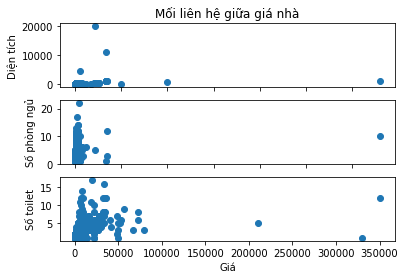

In [3]:
# Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.
fig1,axes=plt.subplots(3,1)
axes[0].scatter(dt['price'],dt['area'],label='area')
axes[1].scatter(dt['price'],dt['bedroom'],label='bedroom')
axes[2].scatter(dt['price'],dt['toilet'],label='toilet')
axes[0].set_title('Mối liên hệ giữa giá nhà')
axes[2].set_xlabel('Giá')
axes[0].set_ylabel('Diện tích')
axes[1].set_ylabel('Số phòng ngủ')
axes[2].set_ylabel('Số toilet')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

plt.show()

In [5]:
dt.loc[dt.loc[:,'type_of_land']=='Bán nhà mặt phố\n ','type_of_land']='Bán nhà mặt phố'
dt.loc[dt.loc[:,'type_of_land']=='Bán nhà riêng\n ','type_of_land']='Bán nhà riêng'
dt.loc[dt.loc[:,'type_of_land']=='Bất động sản khác\n ','type_of_land']='Bất động sản khác'
dt['type_of_land'].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [8]:
dt2=dt.loc[:,{'type_of_land','price'}]
dt2.head()

,type_of_land,price
0,Bán nhà riêng,14700.0
1,Bán nhà mặt phố,12500.0
2,Bán nhà riêng,4200.0
3,Bán nhà riêng,11000.0
4,Bán nhà mặt phố,36000.0


In [9]:
al=dt2[dt2['type_of_land']=='Bán nhà riêng']
nr=al['price'].sum()
kl=dt2[dt2['type_of_land']=='Bán nhà mặt phố']
mp=kl['price'].sum()
jl=dt2[dt2['type_of_land']=='Tập thể, cư xá']
tt=jl['price'].sum()
ml=dt2[dt2['type_of_land']=='Chung cư']
cc=ml['price'].sum()
nl=dt2[dt2['type_of_land']=='Bất động sản khác']
bđs=nl['price'].sum()
bl=dt2[dt2['type_of_land']=='Đất thổ cư']
đtc=bl['price'].sum()
p = [nr,mp,tt,cc,bđs,đtc]
ar = ['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư']
dt3=pd.DataFrame()
dt3['X']=ar
dt3['Y']=p
dt3

,X,Y
0,Bán nhà riêng,4591556.6
1,Bán nhà mặt phố,15455939.9
2,"Tập thể, cư xá",144530.0
3,Chung cư,118700.0
4,Bất động sản khác,400800.0
5,Đất thổ cư,84680.0


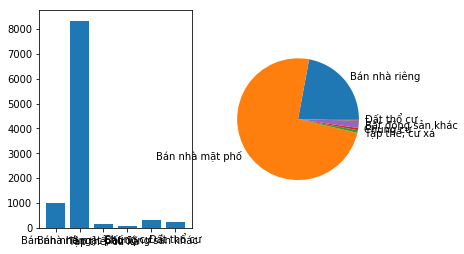

In [10]:
# So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
fig,ax=plt.subplots(1,2)
ax[0].bar(dt['type_of_land'], dt['1m2'])
ax[1].pie(dt3.iloc[:,1], labels = dt3.iloc[:,0])
plt.show()

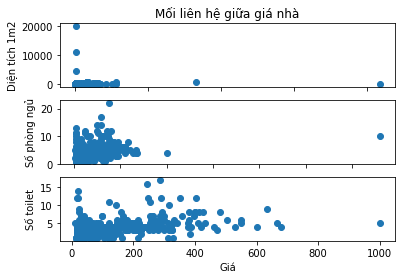

In [11]:
# Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.
fig1,axes=plt.subplots(3,1)
axes[0].scatter(dt['1m2'],dt['area'],label='area')
axes[1].scatter(dt['1m2'],dt['bedroom'],label='bedroom')
axes[2].scatter(dt['1m2'],dt['toilet'],label='toilet')
axes[0].set_title('Mối liên hệ giữa giá nhà')
axes[2].set_xlabel('Giá')
axes[0].set_ylabel('Diện tích 1m2')
axes[1].set_ylabel('Số phòng ngủ')
axes[2].set_ylabel('Số toilet')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

plt.show()